In [1]:
import numpy as np
import matplotlib.pyplot as plt


from keras.models import Sequential

from keras.layers import Dense
from keras.layers import LSTM, SimpleRNN
from keras.optimizer_v2.adam import Adam
from sklearn.preprocessing import MinMaxScaler
from keras import models, layers

from keras.models import load_model

from google.colab import drive
drive.mount('/content/drive')

#загружаю модель

model = load_model('/content/drive/My Drive/RNN_results/RNN_2104_my_model.h5')        #99
model.load_weights('/content/drive/My Drive/RNN_results/RNN_2104_my_model_weights.h5')

print(model.summary())

#параметры модели

LL = 100 #длина памяти
NN = LL #длина последовательности

Mounted at /content/drive
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                520       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________
None


0
[[ 0.          0.          0.         ...  0.          0.
   3.24181384]
 [ 0.          0.          0.         ...  0.          3.24181384
  -2.49688102]
 [ 0.          0.          0.         ...  3.24181384 -2.49688102
  -5.93995498]
 ...
 [ 0.          0.          3.24181384 ... -2.59306767 -5.95401281
  -3.84086604]
 [ 0.          3.24181384 -2.49688102 ... -5.95401281 -3.84086604
   1.80355526]
 [ 3.24181384 -2.49688102 -5.93995498 ... -3.84086604  1.80355526
   5.78979617]]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 1. ... 1. 1. 1.]
 [0. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
max = 1.0
output =  [ 3.2308977e+00  3.2319286e-01 -1.7562064e+00 -2.2822783e+00
 -1.4846114e+00 -2.8670150e-01  3.9477682e-01  2.3586369e-01
 -3.9715263e-01 -8.6016989e-01 -7.8153759e-01 -3.0230808e-01
  1.2721676e-01  1.6658194e-01 -1.5020773e-01 -4.9690962e-01
 -5.6433821e-01 -3.1797224e-01  3.0190218e-03  1.2085466e-01
 -3.7645221e-02 -3.0082926e-01 -4

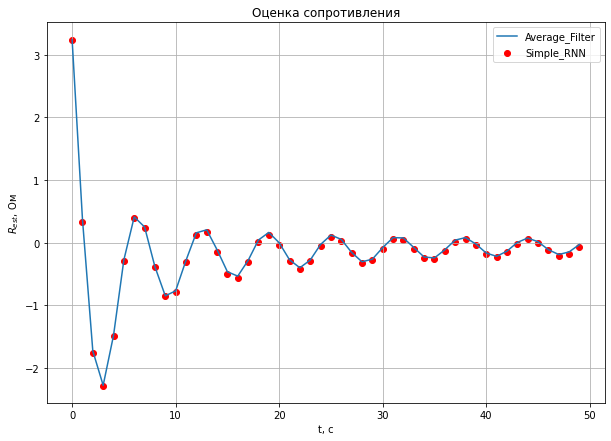

[[[ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]
  ...
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.06483628  1.        ]]

 [[ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]
  ...
  [ 0.          0.        ]
  [ 0.06483628  1.        ]
  [-0.04993762  1.        ]]

 [[ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]
  ...
  [ 0.06483628  1.        ]
  [-0.04993762  1.        ]
  [-0.1187991   1.        ]]

 ...

 [[ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.06483628  1.        ]
  ...
  [-0.05186135  1.        ]
  [-0.11908026  1.        ]
  [-0.07681732  1.        ]]

 [[ 0.          0.        ]
  [ 0.06483628  1.        ]
  [-0.04993762  1.        ]
  ...
  [-0.11908026  1.        ]
  [-0.07681732  1.        ]
  [ 0.03607111  1.        ]]

 [[ 0.06483628  1.        ]
  [-0.04993762  1.        ]
  [-0.1187991   1.        ]
  ...
  [-0.07681732  1.      

In [10]:
LL = 50 #длина памяти
NN = LL #длина последовательности
norma_c = 50*(int(LL/50))
norma_c = 50*50/LL
#norma_c = 1

norma_c = 50

def reforming_test(data_s, state):
    data_x, data_y =[], []
    N = len(data_s)
    data_x = state
    
    #data_s = np.asarray(data_s)
    for i in range(len(data_s)):
        data_x[i, 0: i + 1] = data_s[0:i+1]
        #data_y.append((sum(data_s[0:i+1]))/(i+1))
        data_y.append(np.mean(data_s[0:i+1]))
        
    return data_x, data_y

def reforming_time_test(time, state_time):
    N = len(time)
    data_time = np.zeros((N, N))

    if (state_time == data_time).all():
    
      for i in range(N):
        data_time[i,:] = time[i]*np.ones(N)
    else:
      for i in range(N):
        data_time[i,:] = 25*np.ones(N)
    return data_time



def reforming(data_s):
    data_x, data_y =[], []
    N = len(data_s)
    data_x = np.zeros((N, N))
    
    #data_s = np.asarray(data_s)
    for i in range(len(data_s)):
        data_x[i, N - i - 1: N] = data_s[0:i+1]
        #data_y.append((sum(data_s[0:i+1]))/(i+1))
        data_y.append(np.mean(data_s[0:i+1]))
    #data_x = np.fliplr(data_x)
    return data_x, data_y

def reforming_time(time):
    N = len(time)
    data_time = np.zeros((N, N))
    
    for i in range(N):
        data_time[i,:] = time[i]*np.ones(N)
    return data_time


def reforming_time_post(time):
    N = len(time)
    data_time = np.zeros((N, N))
    
    for i in range(N):
        data_time[i, N - i - 1: N] = np.ones(i+1)
    #data_time = np.flip(data_time, axis = 1)
    return data_time

#yyy = 5 + 6*np.random.randn(NN)


t = np.arange(1, NN + 1)


yyy = 6*np.cos(t)
#tt = reforming_time(t)

test_yyy, yyy_d = reforming(yyy)



state = np.zeros((LL, LL))
state_t = np.zeros((LL, LL))

for j in range(int(NN/LL)):
  print(j)
  data_base = yyy[j*LL : (j+1)*LL]
  data_batch, target_batch = reforming(data_base)

  data_tt = t[j*LL : (j+1)*LL]
  #data_tt = t
  time = reforming_time_post(data_tt)
  #time = reforming_time(data_tt)
  state = (data_batch[LL - 1])*np.ones((LL, LL))
  state_t = (time[LL - 1])*np.ones((LL, LL))
  if j == 0:
    res_time = time
    res_data = data_batch
  else:
    res_data = np.concatenate((res_data, data_batch))
    res_time = np.concatenate((res_time, time))

#print(state)
print(res_data)
print(res_time)



#преобразуем данные
res_time = np.reshape(res_time, (NN, LL, 1))

res_data = np.reshape(res_data/norma_c, (NN, LL, 1))

data_test = np.concatenate((res_data, res_time), axis = 2)


print('max =', np.max(data_test))

#data_test = data_test/np.max(data_test)
data_test = (25/25)*data_test

output =  norma_c*model.predict(data_test, batch_size = 1)

output = np.reshape(output, (NN))

print('output = ', output)

ress = []
for i in range(len(yyy)):
  if i<LL:
    ress.append(np.mean(yyy[0:i + 1]))
  else:
    ress.append((np.sum(yyy[0 + i - (LL - 1) :i + 1]))/LL)

ress = np.asarray(ress)

kkk = np.arange(0, NN)

plt.figure(figsize = (10, 7))
plt.scatter(kkk, output, label = 'Simple_RNN', c = 'r')
plt.plot(kkk, ress, label = 'Average_Filter')
#plt.axis([0, 100, 0, 10])
plt.title('Оценка сопротивления')
plt.xlabel('t, с')
plt.ylabel('$R_{est}$, Ом')
plt.legend()
plt.grid()
plt.show()

print(data_test)

In [ ]:
#New

from keras.layers import Input
from keras.models import Model

#NN = 200

#LL = 100

newmodel = Sequential()

#trainy = np.asarray(y_train)

#trainy = np.asarray(y_train)

newmodel.add(LSTM(50, batch_input_shape=(1, 1, 2), activation='tanh', stateful=True))
newmodel.add(Dense(1, activation = 'linear'))
#model.compile(loss = 'mean_squared_error', optimizer = Adam(learning_rate = 0.0001))
newmodel.summary()
newmodel.load_weights('/content/drive/My Drive/RNN_results/RNN_99_my_model_weights.h5')

newmodel.reset_states()




Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (1, 50)                   10600     
                                                                 
 dense_3 (Dense)             (1, 1)                    51        
                                                                 
Total params: 10,651
Trainable params: 10,651
Non-trainable params: 0
_________________________________________________________________


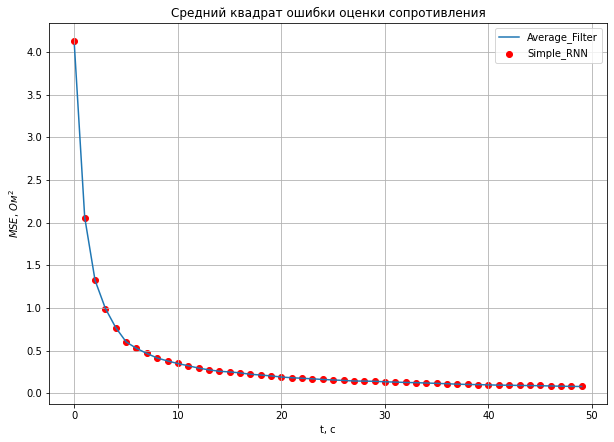

In [3]:
#теперь построить среднеквадартическую ошибку
N = 50
std_theory = []
std_RNN = []
#for i in range(len(Y_test)):
  #std_theory.append(np.std(Y_test[0:i + 1]))
  #std_RNN.append(np.std(output[0: i + 1]))


for i in range(1000):
  Y_testt = 5 + 2*np.random.randn(N)

  t = np.arange(1, len(Y_testt) + 1)

  tt = reforming_time_post(t)
  tt = np.reshape(tt, (N, N, 1))




  x_test, y_test = reforming(Y_testt)

  testx = np.reshape(x_test, (N, N, 1)) 

  data_test = np.concatenate((testx/50, tt), axis = 2)

  #data_test = data_test/np.max(data_test)

  output =  50*model.predict(data_test)

  output = np.reshape(output, (N))

  std_RNN.append(output)

  ress = []
  for j in range(len(Y_testt)):
    ress.append(np.mean(Y_testt[0:j + 1]))


    #ress = np.reshape(ress, (25))
  
  std_theory.append(ress)


stdd_RNN = np.asarray(std_RNN)

m_x = 5*np.ones((stdd_RNN.shape[0], stdd_RNN.shape[1]))

mass = (stdd_RNN - m_x)**2

MSE_RNN = (np.sum(mass, axis = 0))/1000



stdd_theory = np.asarray(std_theory)


mass_t = (stdd_theory - m_x)**2

MSE_Average = (np.sum(mass_t, axis = 0))/1000
k = np.arange(0, N)

plt.figure(figsize = (10, 7))
plt.scatter(k, MSE_RNN, label = 'Simple_RNN', c = 'r')
plt.plot(k, MSE_Average, label = 'Average_Filter')
plt.title('Cредний квадрат ошибки оценки сопротивления')
plt.xlabel('t, с')
plt.ylabel('$MSE$, $Ом^2$')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#print(data_test)

from keras.layers import Input
from keras.models import Model

#NN = 200

#LL = 100

newmodel = Sequential()

#trainy = np.asarray(y_train)

inputs_1 = Input(shape=(None, 2))
lstm_1, state_h, state_c  = LSTM(50, activation='tanh', stateful=False, return_state = True)(inputs_1)
print('state_h =', state_h)
#newmodel.add(lstm_1)
output = Dense(1, activation = 'linear')(lstm_1)
newmodel = Model(inputs = inputs_1, outputs = [output, state_h, state_c])
newmodel.summary()
newmodel.load_weights('/content/drive/My Drive/RNN_results/RNN_99_my_model_weights.h5')

newmodel.reset_states()





state_h = KerasTensor(type_spec=TensorSpec(shape=(None, 50), dtype=tf.float32, name=None), name='lstm_9/PartitionedCall:2', description="created by layer 'lstm_9'")
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, None, 2)]         0         
                                                                 
 lstm_9 (LSTM)               [(None, 50),              10600     
                              (None, 50),                        
                              (None, 50)]                        
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,651
Trainable params: 10,651
Non-trainable params: 0
_________________________________________________________________


state_hh = [array([[0.07606249],
       [0.09323657],
       [0.09714048],
       [0.11188617],
       [0.11777587],
       [0.12940167],
       [0.12849376],
       [0.12564555],
       [0.12097105],
       [0.11904372],
       [0.11458237],
       [0.11737469],
       [0.11748519],
       [0.11601498],
       [0.10930576],
       [0.10818727],
       [0.10888102],
       [0.11425688],
       [0.11387156],
       [0.11259986],
       [0.11318173],
       [0.11274608],
       [0.1135638 ],
       [0.11249433],
       [0.11311648],
       [0.11757492],
       [0.11798783],
       [0.11758433],
       [0.11668792],
       [0.11734319],
       [0.11803706],
       [0.11659192],
       [0.11660729],
       [0.11522734],
       [0.11527792],
       [0.11600219],
       [0.1132968 ],
       [0.11180581],
       [0.11179291],
       [0.11060767],
       [0.11027967],
       [0.10961132],
       [0.10939842],
       [0.10931583],
       [0.1081852 ],
       [0.10786087],
       [0.10761598],
 

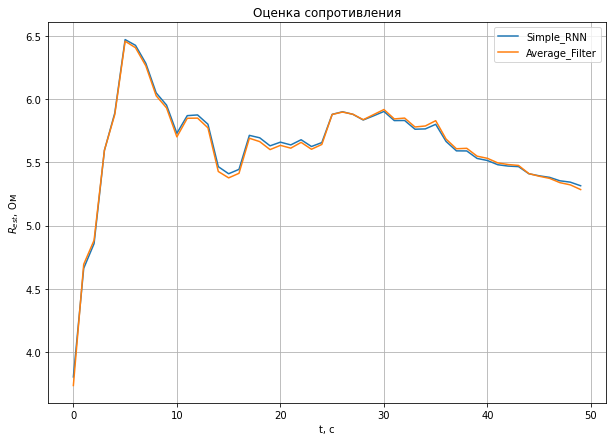

[[[0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]
  ...
  [0.         0.        ]
  [0.         0.        ]
  [0.07470449 1.        ]]

 [[0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]
  ...
  [0.         0.        ]
  [0.07470449 1.        ]
  [0.11302978 1.        ]]

 [[0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]
  ...
  [0.07470449 1.        ]
  [0.11302978 1.        ]
  [0.1052577  1.        ]]

 ...

 [[0.         0.        ]
  [0.         0.        ]
  [0.07470449 1.        ]
  ...
  [0.0890134  1.        ]
  [0.09197931 1.        ]
  [0.07482693 1.        ]]

 [[0.         0.        ]
  [0.07470449 1.        ]
  [0.11302978 1.        ]
  ...
  [0.09197931 1.        ]
  [0.07482693 1.        ]
  [0.089831   1.        ]]

 [[0.07470449 1.        ]
  [0.11302978 1.        ]
  [0.1052577  1.        ]
  ...
  [0.07482693 1.        ]
  [0.089831   1.        ]
  [0.06917173 1.        ]]]
state_hh =

In [ ]:
LL = 50
NN = LL

yyy = 5 + 2*np.random.randn(NN)

t = np.arange(1, NN + 1)

#tt = reforming_time(t)

test_yyy, yyy_d = reforming(yyy)



state = np.zeros((LL, LL))
state_t = np.zeros((LL, LL))

for j in range(int(NN/LL)):
  data_base = yyy[j*LL : (j+1)*LL]
  data_batch, target_batch = reforming(data_base)

  data_tt = t[j*LL : (j+1)*LL]
  #data_tt = t
  time = reforming_time_post(data_tt)
  #time = reforming_time(data_tt)
  state = (data_batch[LL - 1])*np.ones((LL, LL))
  state_t = (time[LL - 1])*np.ones((LL, LL))
  if j == 0:
    res_time = time
    res_data = data_batch
  else:
    res_data = np.concatenate((res_data, data_batch))
    res_time = np.concatenate((res_time, time))

#print(state)
#print(res_data)
#print(res_time)



#преобразуем данные
res_time = np.reshape(res_time, (NN, LL, 1))

res_data = np.reshape(res_data/50, (NN, LL, 1))

data_test = np.concatenate((res_data, res_time), axis = 2)


#print('max =', np.max(data_test))

#data_test = data_test/np.max(data_test)
data_test = (25/25)*data_test

#res_time = np.ones(NN)
#res_time = np.reshape(res_time, (NN, 1, 1))

#data_tester = np.reshape(yyy, (NN, 1, 1))

#data_test = np.concatenate((data_tester, res_time), axis = 2)

output =  newmodel.predict(data_test, batch_size=NN)

state_hh = output[1]
state_cc = output[2]

print('state_hh =', output)

output_2 = np.reshape(50*output[0], (NN))

#print('output = ', output)

ress = []
for i in range(len(yyy)):
  if i<LL:
    ress.append(np.mean(yyy[0:i + 1]))
  else:
    ress.append((np.sum(yyy[0 + i - (LL - 1) :i + 1]))/LL)

ress = np.asarray(ress)

kkk = np.arange(0, NN)

plt.figure(figsize = (10, 7))
plt.plot(kkk, output_2, label = 'Simple_RNN')
plt.plot(kkk, ress, label = 'Average_Filter')
plt.title('Оценка сопротивления')
plt.xlabel('t, с')
plt.ylabel('$R_{est}$, Ом')
plt.legend()
plt.grid()
plt.show()

print(data_test)



newmodel.reset_states()

print('state_hh =', state_hh)

In [ ]:
NN = 60

yxx = 5 + 2*np.random.randn(NN)



In [ ]:
print(res_time)

[[[1.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[1.]
  [1.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[1.]
  [1.]
  [1.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [0.]
  [0.]]

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [0.]]

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]]


In [ ]:
#инициализация по новой


from keras.layers import Input
from keras.models import Model

import tensorflow as tf

inputs_2 = Input(shape=(None, 2))
#lstm_2, state_h, state_c  = LSTM(50, activation='tanh', stateful=False, return_state = True)(inputs_2)

lstm_2 = tf.keras.layers.LSTM(50, activation = 'tanh')

sh = tf.convert_to_tensor(state_hh)
sc = tf.convert_to_tensor(state_cc)

lstm_3 = lstm_2(inputs_2, initial_state=[sh, sc])
print('state_h =', state_h)
#newmodel.add(lstm_1)
output = Dense(1, activation = 'linear')(lstm_3)
newmodel_1 = Model(inputs = inputs_2, outputs = output)
newmodel_1.summary()
newmodel_1.load_weights('/content/drive/My Drive/RNN_results/RNN_99_my_model_weights.h5')


#outputs = LSTM(inputs, initial_state=[state_hh, state_cc])

state_h = KerasTensor(type_spec=TensorSpec(shape=(None, 50), dtype=tf.float32, name=None), name='lstm_9/PartitionedCall:2', description="created by layer 'lstm_9'")
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, None, 2)]         0         
                                                                 
 lstm_10 (LSTM)              (50, 50)                  10600     
                                                                 
 dense_9 (Dense)             (50, 1)                   51        
                                                                 
Total params: 10,651
Trainable params: 10,651
Non-trainable params: 0
_________________________________________________________________


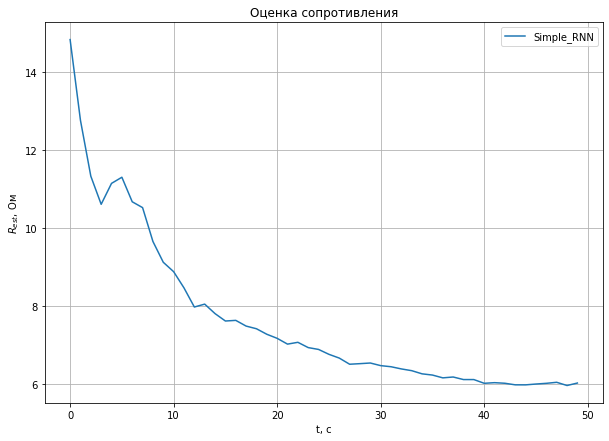

In [ ]:
yaa = 5 + 2*np.random.randn(NN)
#yaa = output_2
t = np.arange(1, NN + 1)

statut = yyy

def reforming_statut(data_s, statut):
    data_x, data_y =[], []
    N = len(data_s)
    data_x = statut*np.ones((N, N))
    
    #data_s = np.asarray(data_s)
    for i in range(len(data_s)):
        data_x[i, N - i - 1: N] = data_s[0:i+1]
        #data_y.append((sum(data_s[0:i+1]))/(i+1))
        data_y.append(np.mean(data_s[0:i+1]))
    #data_x = np.fliplr(data_x)
    return data_x, data_y


data_batch, target_batch = reforming_statut(yaa, statut)

data_tt = t
#data_tt = t
time = reforming_time_post(data_tt)

res_time = np.reshape(time, (NN, LL, 1))

res_data = np.reshape(data_batch/50, (NN, LL, 1))

data_test = np.concatenate((res_data, res_time), axis = 2)


output =  50*newmodel_1.predict(data_test, batch_size=NN)

kkk = np.arange(0, NN)

plt.figure(figsize = (10, 7))
plt.plot(kkk, output, label = 'Simple_RNN')
#plt.plot(kkk, ress, label = 'Average_Filter')
plt.title('Оценка сопротивления')
plt.xlabel('t, с')
plt.ylabel('$R_{est}$, Ом')
plt.legend()
plt.grid()
plt.show()

